# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 5</font>
## <font color='blue'>Análise de Correlação e Análise de Causalidade em Séries Temporais</font>

![title](imagens/Lab5.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np

# Filtrando warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy : 1.26.4
pandas: 2.0.3



## Análise de Correlação em Séries Temporais - Análise de Defasagens

A análise de defasagens, também conhecida como análise de lag, é uma técnica importante na análise de séries temporais para entender a dependência temporal entre diferentes lags.

Na análise de séries temporais, o termo "lag" é frequentemente usado para se referir a observações passadas em um período de tempo específico. Por exemplo, em um conjunto de dados diários, lag 1 seria o dia anterior, lag 2 seria dois dias antes e assim por diante.

A análise de lag é uma forma de analisar como a correlação entre uma variável e sua própria versão atrasada (lag) varia ao longo do tempo. Isto é frequentemente feito usando autocorrelação e autocorrelação parcial.

**Autocorrelação**: A autocorrelação mede a relação linear entre uma observação e suas observações anteriores. Um gráfico de autocorrelação (ou correlograma) pode ser usado para visualizar essa relação. As barras no gráfico representam o coeficiente de correlação entre a série temporal e ela mesma com lags.

**Autocorrelação parcial**: A autocorrelação parcial é uma medida da relação entre uma observação e seus lags, controlando a relação com todos os lags intermediários. O gráfico de autocorrelação parcial (PACF) pode ser útil para identificar a ordem de um modelo autoregressivo (AR), uma ferramenta comum em análise de séries temporais.

A análise de lag é útil para identificar padrões temporais em séries temporais, como tendências ou sazonalidade. Ela também é uma etapa importante na construção de modelos preditivos para séries temporais, como modelos ARIMA.

No exemplo abaixo criaremos uma série temporal que tem uma tendência ascendente com algum ruído. A função de autocorrelação (ACF) mostra a autocorrelação para diferentes lags e a função de autocorrelação parcial (PACF) mostra a autocorrelação para um dado lag controlando as autocorrelações para todos os lags menores.

In [4]:
# Imports
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.8.2
numpy      : 1.26.4
statsmodels: 0.14.1
pandas     : 2.0.3



In [6]:
# Criando uma série temporal com tendência
np.random.seed(0)
n = 100 # número de pontos de dados
x = np.linspace(0, 10, n)
y = x + np.random.normal(0, 1, n)

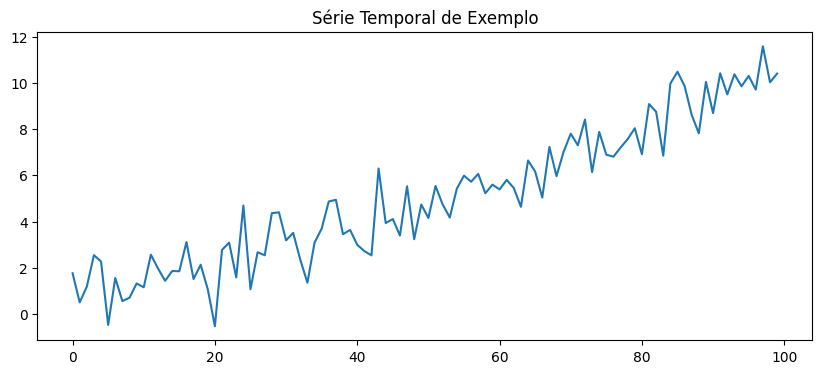

In [7]:
# Visualizando a série temporal
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Série Temporal de Exemplo')
plt.show()

<Figure size 1000x400 with 0 Axes>

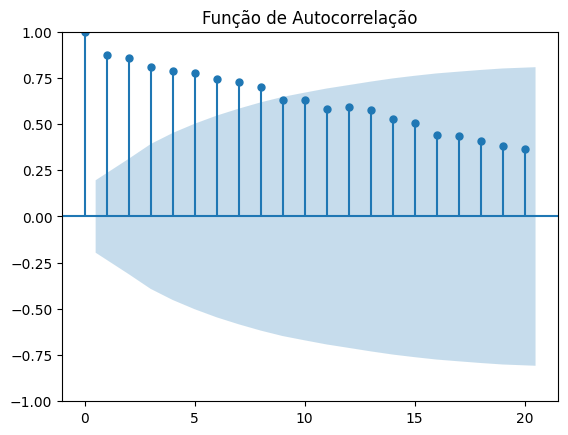

In [8]:
# Calculando e plotando a função de autocorrelação (ACF)
plt.figure(figsize = (10, 4))
plot_acf(y, lags = 20)
plt.title('Função de Autocorrelação')
plt.show()

<Figure size 1000x400 with 0 Axes>

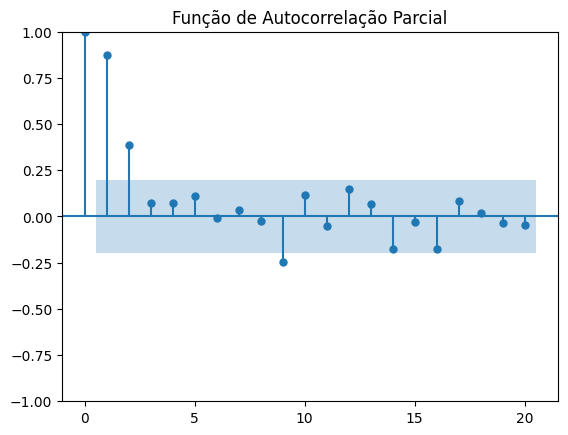

In [9]:
# Calculando e plotando a função de autocorrelação parcial (PACF)
plt.figure(figsize = (10, 4))
plot_pacf(y, lags = 20)
plt.title('Função de Autocorrelação Parcial')
plt.show()

> O gráfico ACF mostra uma autocorrelação significativa em muitos lags, o que é esperado de uma série temporal com uma tendência. O gráfico PACF, por outro lado, mostra uma autocorrelação significativa apenas no lag 1, porque a correlação em lags maiores é explicada pelo lag 1.

## Análise de Correlação em Séries Temporais - Função de Autocorrelação

A Função de Autocorrelação (ACF) é uma ferramenta estatística usada para identificar qualquer autocorrelação na série temporal. A autocorrelação é a correlação de uma série temporal com sua própria versão deslocada.

A função de autocorrelação fornece correlações de uma série com seus próprios valores passados, diferindo por vários lags. As correlações para diferentes lags ajudam a identificar padrões na série temporal.

A função de autocorrelação pode ser representada visualmente em um gráfico de autocorrelação. No gráfico, o eixo x representa o tamanho do lag e o eixo y representa a força da autocorrelação. Se a série temporal é aleatória, a maioria das autocorrelações para lags maiores que zero será próxima de zero. Se a série temporal não é aleatória, então uma ou mais das autocorrelações serão significativamente diferentes de zero.

Por exemplo, em uma série temporal onde os valores aumentam ao longo do tempo (tendência), veríamos autocorrelações significativamente positivas em lags iniciais. E se uma série temporal é periódica, veríamos picos em lags no período da série.

A função de autocorrelação é uma ferramenta importante para entender os padrões em uma série temporal e é frequentemente usada na identificação de modelos apropriados para a análise de séries temporais. Por exemplo, ela é usada na seleção do termo MA (média móvel) no modelo ARIMA (Modelo Autoregressivo Integrado de Média Móvel).

In [10]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [11]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.8.2
numpy      : 1.26.4
statsmodels: 0.14.1
pandas     : 2.0.3
seaborn    : 0.13.2



In [12]:
# Vamos criar alguns dados de ações fictícias
np.random.seed(0)
dates = pd.date_range(start = '2021-01-01', end = '2024-01-01', freq = 'B') # dias úteis
prices = np.random.normal(1.0, 0.03, len(dates)).cumprod() # preços aleatórios
df = pd.DataFrame(data = prices, index = dates, columns = ['Close'])

In [13]:
# Visualizando os primeiros registros
print(df.head())

               Close
2021-01-01  1.052922
2021-01-04  1.065562
2021-01-05  1.096849
2021-01-06  1.170586
2021-01-07  1.236171


In [14]:
# Visualizando os últimos registros
print(df.tail())

               Close
2023-12-26  0.138170
2023-12-27  0.131404
2023-12-28  0.131139
2023-12-29  0.136998
2024-01-01  0.139141


In [15]:
# Estamos interessados na correlação do dia com o dia anterior
lag = 1
autocorrelation = df['Close'].autocorr(lag)
print(f'Autocorrelação com lag {lag}: {autocorrelation}')

Autocorrelação com lag 1: 0.998425903176589


## Interpretando as Funções de Autocorrelação

Interpretar as funções de autocorrelação (ACF) e autocorrelação parcial (PACF) é uma habilidade chave para entender a dinâmica de uma série temporal e, portanto, para modelar e prever séries temporais.

**ACF (Autocorrelation Function)**

Um gráfico de autocorrelação (ACF) mostra a correlação de uma série temporal com seus próprios lags. Cada barra do gráfico representa a correlação entre a série temporal original e a versão da série temporal deslocada por um número específico de lags.

Por exemplo, a barra no lag 1 é a correlação entre a série temporal original e a versão da série temporal deslocada por 1 período. As barras que se estendem além da área sombreada (intervalo de confiança) indicam correlações que são estatisticamente significativas.

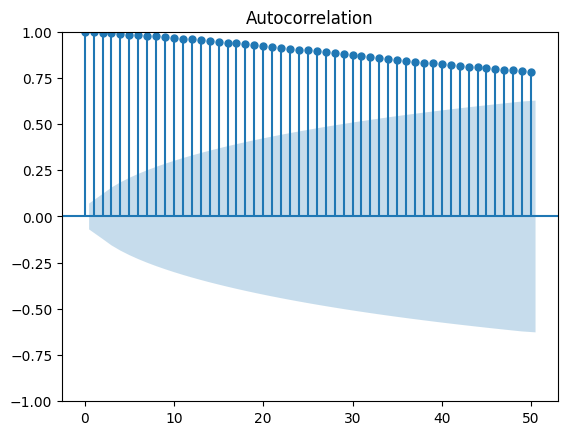

In [16]:
# ACF
plot_acf(df['Close'], lags = 50)
plt.show()

## Interpretando as Funções de Autocorrelação

**PACF (Partial Autocorrelation Function)**

A função de autocorrelação parcial (PACF) mede a correlação entre uma observação e seu lag, removendo os efeitos de quaisquer correlações devido aos termos em lags intermediários. Por exemplo, a PACF no lag 3 é a correlação entre a série temporal original e a versão da série temporal deslocada por 3 períodos, depois de remover as correlações devido aos lags 1 e 2.

As barras que se estendem além da área sombreada no gráfico PACF também indicam correlações que são estatisticamente significativas.

<Figure size 1000x400 with 0 Axes>

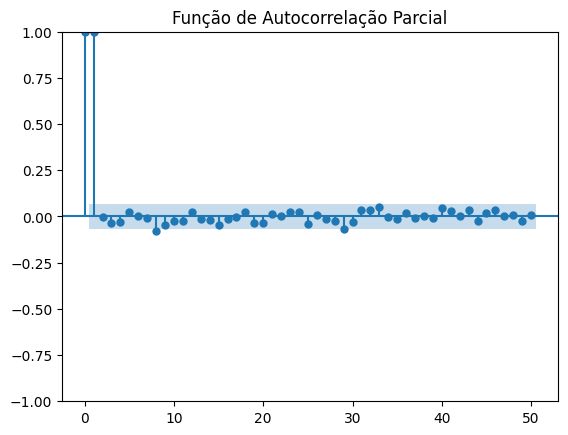

In [17]:
# Calculando e plotando a função de autocorrelação parcial (PACF)
plt.figure(figsize = (10, 4))
plot_pacf(df['Close'], lags = 50)
plt.title('Função de Autocorrelação Parcial')
plt.show()

Os gráficos ACF e PACF são utilizados para identificar os termos apropriados para incluir em modelos autoregressivos (AR), modelos de média móvel (MA) ou modelos ARIMA.

Em um modelo AR(p), esperamos que o gráfico PACF corte após p lags e que o gráfico ACF diminua gradualmente.

Em um modelo MA(q), esperamos que o gráfico ACF corte após q lags e que o gráfico PACF diminua gradualmente.

Em um modelo ARIMA, os padrões podem ser mais complexos devido à combinação de termos AR e MA.

Outros fatores como a estacionariedade da série temporal e a sazonalidade também devem ser levados em conta ao modelar séries temporais.

## Análise de Causalidade em Séries Temporais

Para analisar a causalidade em séries temporais, podemos usar o teste de causalidade de Granger. Vamos utilizar a biblioteca statsmodels para realizar este teste.

Apenas para esclarecer, é importante notar que o teste de causalidade de Granger não testa causalidade no sentido tradicional. Em vez disso, ele testa se os valores passados de uma variável ajudam a prever a variável atual além de seus próprios valores passados. Como tal, uma "causa" de Granger pode não ser uma causa no sentido usual da palavra.

Neste exemplo, vamos gerar duas séries temporais aleatórias e então aplicar o teste de causalidade de Granger para ver se uma série "causa a outra".

In [18]:
# Imports
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

In [19]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.8.2
numpy      : 1.26.4
statsmodels: 0.14.1
pandas     : 2.0.3
seaborn    : 0.13.2



In [20]:
# Configurando a semente aleatória para reprodutibilidade
np.random.seed(0)

# Gerando duas séries temporais aleatórias
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# Criando um DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Aplicando o teste de causalidade de Granger
gc_results = grangercausalitytests(df[['x', 'y']], maxlag = 2, verbose = False)

# Mostrando os resultados
for lag, result in gc_results.items():
    pvalue = result[0]['ssr_ftest'][1]
    print(f'Lag: {lag}, Valor-p: {pvalue}')

Lag: 1, Valor-p: 0.5990992737078038
Lag: 2, Valor-p: 0.8632343343183275


No código acima, primeiro criamos duas séries temporais aleatórias x e y, que são independentes uma da outra. Em seguida, usamos a função grangercausalitytests do pacote statsmodels para executar o teste de causalidade de Granger, com um máximo de 2 lags. O resultado deste teste é um dicionário de estatísticas do teste, das quais estamos interessados no valor-p do teste F.

O valor-p é a probabilidade de que a hipótese nula seja verdadeira. No contexto do teste de Granger, a hipótese nula é que os coeficientes correspondentes aos valores passados de x são zero, ou seja, que x não causa y. Se o valor-p for pequeno (geralmente, menor que 0,05 é considerado significativo), então rejeitamos a hipótese nula e concluímos que x causa y.

Neste exemplo, uma vez que x e y são independentes, esperamos que o valor-p seja grande e não possamos rejeitar a hipótese nula.

Observe que o teste de Granger assume que as séries temporais são estacionárias. Se você estiver trabalhando com séries temporais não estacionárias, pode ser necessário primeiro diferenciá-las ou transformá-las de alguma outra maneira para torná-las estacionárias antes de realizar o teste de Granger.

In [21]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# Configurar parâmetros
np.random.seed(42) # para resultados consistentes
n = 200 # número de observações
max_lag = 3


# Gerar a série X como um ruído branco
X = np.random.normal(size = (n,))

# Gerar a série Y como uma combinação linear dos valores passados e do valor atual de X
Y = np.zeros_like(X)
for t in range(1, n):
    Y[t] = X[t] + 0.5 * X[t-1] + np.random.normal()

# Reorganizar em uma matriz 2D para o teste de Granger
XY = np.column_stack([X, Y])

# Realizar o teste de Granger
gc_res = grangercausalitytests(XY, maxlag = max_lag)

print("\n")

# Mostrando os resultados
for lag, result in gc_res.items():
    pvalue = result[0]['ssr_ftest'][1]
    print(f'Lag: {lag}, Valor-p: {pvalue}')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2241  , p=0.6365  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.2275  , p=0.6334  , df=1
likelihood ratio test: chi2=0.2274  , p=0.6335  , df=1
parameter F test:         F=0.2241  , p=0.6365  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0246  , p=0.9757  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=0.0506  , p=0.9750  , df=2
likelihood ratio test: chi2=0.0506  , p=0.9750  , df=2
parameter F test:         F=0.0246  , p=0.9757  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9559  , p=0.0337  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=9.1944  , p=0.0268  , df=3
likelihood ratio test: chi2=8.9863  , p=0.0295  , df=3
parameter F test:         F=2.9559  , p=0.0337  , df_denom=190, df_num=3


Lag: 1, Valor-p: 0.6364790676745775
Lag: 2, Valor-p: 0.9756563697263869
Lag: 3, Valor-p: 0.0

Conclusão: Somente no lag 3 foi possível estabelecer a relação de causa entre X e Y, com valores passados de X ajudando a prever valores futuros de Y (além dos próprios valores passados de Y).

## Correlação Cruzada e Interpretação do Gráfico

A correlação cruzada é uma medida da similaridade de duas séries temporais como função do deslocamento aplicado a uma delas. É comumente usada para encontrar padrões repetidos em uma série em relação a outra série, ou para identificar o lag entre as séries.

Vejamos um exemplo.

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.8.2
numpy      : 1.26.4
statsmodels: 0.14.1
pandas     : 2.0.3
seaborn    : 0.13.2



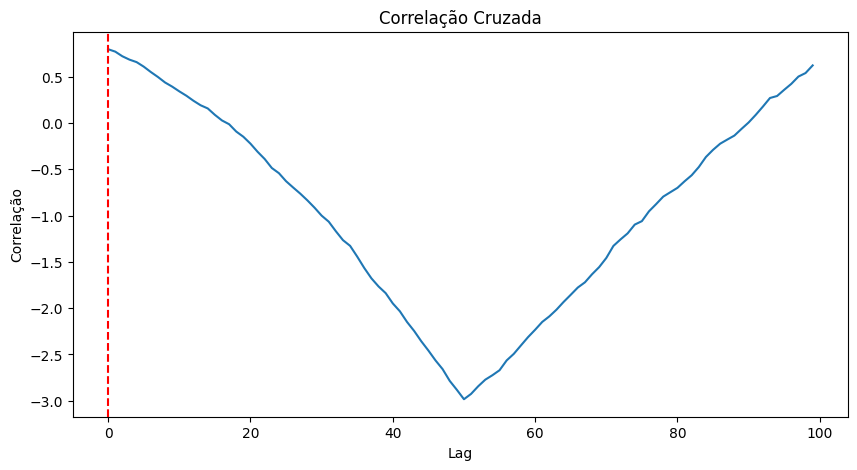

In [27]:
# Configurando a semente aleatória para reprodutibilidade
np.random.seed(0)

# Gerando duas séries temporais, onde a série y é uma versão deslocada e ruidosa da série x
x = np.linspace(0, 10, 100)
y = x + np.random.normal(0, 1, 100) + 5.0

# Calculando a correlação cruzada
correlation = np.correlate(y - np.mean(y), x - np.mean(x), mode = 'same')

# Normalizando o resultado
correlation = correlation / (np.std(y) * x - np.std(x) * len(x))

# Encontrando o máximo de correlação
lag_max_corr = np.argmax(correlation)

# Plotando a correlação cruzada
plt.figure(figsize = (10, 5))
plt.plot(correlation)
plt.axvline(lag_max_corr, color = 'r', linestyle = '--')
plt.title('Correlação Cruzada')
plt.xlabel('Lag')
plt.ylabel('Correlação')
plt.show()

Nesse exemplo, y é uma versão deslocada de x com algum ruído adicionado. A correlação cruzada é máxima quando as duas séries estão alinhadas, ou seja, no lag que usamos para deslocar a série y em relação à série x.

O gráfico de correlação cruzada mostra a correlação para diferentes lags. A linha pontilhada vermelha indica o lag no qual a correlação é máxima. Nesse caso, o lag de máximo de correlação deve estar perto do meio do gráfico, já que usamos o modo 'same' na função np.correlate, que centraliza o resultado.

Observe que, na prática, quando se trabalha com séries temporais reais, pode ser necessário pré-processar os dados antes de calcular a correlação cruzada, por exemplo, para remover uma tendência ou para tornar as séries estacionárias.

# Fim